# Playing around with Pandas

#### So far, we have considered the information tables both in xml format and txt format. In this lecture and the next, we will look at how to merge the two datasets and get interesting insights from them, using the Pandas library - a very popular and versatile library.

#### Let us first look at the xml data that we collected in a csv file

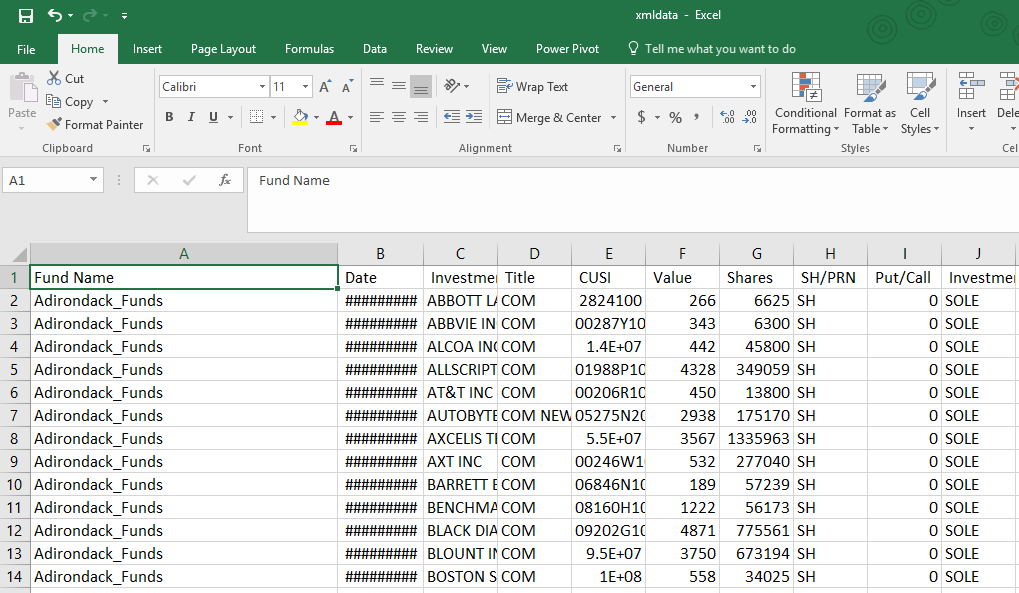

In [45]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Pandas1.png',width=800,height=10)

#### Then let us look at a text data file

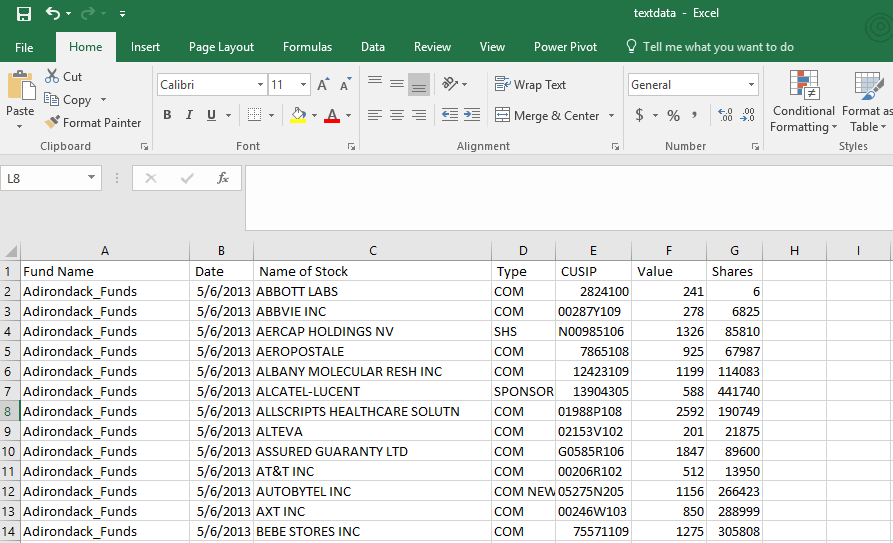

In [46]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Pandas2.png',width=800,height=10)

#### First, lest us import the Pandas library, as we have done in the previous code files

In [47]:
import pandas as pd

#### Next, we will be reading the text data and the xml data into two separate dataframes. Dataframes are one of the common data structures of Pandas, and behaves similar to Tables in SQL and dataframes of R.

In [48]:
textdata = pd.read_csv('Files_Directory/Edgar/textdata.csv', usecols = [0,1,2,3,5,6])
xmldata = pd.read_csv('Files_Directory/Edgar/xmldata.csv', usecols = [0,1,2,3,5,6])

#### By this code, we are getting the Fund Name, Date, Name of the Stock where the Fund has invested, Type fo the Stock, value of investment and number of shares of the investment. Let us take a look at the data

In [49]:
textdata.head()

,Fund Name,Date,Name of Stock,Type,Value,Shares
0,Adirondack_Funds,2013-05-06,ABBOTT LABS,COM,241,6825
1,Adirondack_Funds,2013-05-06,ABBVIE INC,COM,278,6825
2,Adirondack_Funds,2013-05-06,AERCAP HOLDINGS NV,SHS,1326,85810
3,Adirondack_Funds,2013-05-06,AEROPOSTALE,COM,925,67987
4,Adirondack_Funds,2013-05-06,ALBANY MOLECULAR RESH INC,COM,1199,114083


In [50]:
xmldata.head()

,Fund Name,Date,Investment Company Name,Title,Value,Shares
0,Adirondack_Funds,2015-11-10,ABBOTT LABS,COM,266,6625
1,Adirondack_Funds,2015-11-10,ABBVIE INC,COM,343,6300
2,Adirondack_Funds,2015-11-10,ALCOA INC,COM,442,45800
3,Adirondack_Funds,2015-11-10,ALLSCRIPTS HEALTHCARE SOLUTN,COM,4328,349059
4,Adirondack_Funds,2015-11-10,AT&T INC,COM,450,13800


#### Similar results can be observed from the tails() function, which will give us the last few rows of the dataframes. Now, instad of working in separate dataframes, let us combine the two dataframes together. One of the challenges to combine the two data frames is that both have different column names. So, we can workaround that problem in two ways. Open a empty dataframe with the name of the columns we want, and then add the existing two dataframes, without their column rows. Another way is to create a list of column names from one of the dataframes, and then replace the headings of the other dataframe using the list. We will use the latter tactic:

In [51]:
list(textdata.columns.values)

['Fund Name', 'Date', 'Name of Stock', 'Type', 'Value', 'Shares']

In [52]:
xmldata.columns = list(textdata.columns.values)

In [53]:
list(xmldata.columns.values)

['Fund Name', 'Date', 'Name of Stock', 'Type', 'Value', 'Shares']

#### Next step will we adding the two dataframes, using a function called concat in pandas:

In [54]:
df = pd.concat([textdata, xmldata])

#### Now we can take a look at the dataset we have obtained:

In [55]:
df.head()

,Fund Name,Date,Name of Stock,Type,Value,Shares
0,Adirondack_Funds,2013-05-06,ABBOTT LABS,COM,241,6825
1,Adirondack_Funds,2013-05-06,ABBVIE INC,COM,278,6825
2,Adirondack_Funds,2013-05-06,AERCAP HOLDINGS NV,SHS,1326,85810
3,Adirondack_Funds,2013-05-06,AEROPOSTALE,COM,925,67987
4,Adirondack_Funds,2013-05-06,ALBANY MOLECULAR RESH INC,COM,1199,114083


In [56]:
df.shape

(5098, 6)

#### This tells us that there are 4796 rows and 6 columns

In [57]:
df.ndim

2

#### This tells us that it is a 2 dimensional array with rows and columns

In [58]:
df.dtypes

Fund Name        object
Date             object
Name of Stock    object
Type             object
Value             int64
Shares            int64
dtype: object

#### This gives us an idea of the type of data stored in each column. We will work these types later in the lesson

#### The head() functions gives the first 5 rows including the column row. The shape tells us that we have 4796 rows with 6 columns. The numbered column is the index column and it is autoassigned, so pandas by default does not mention it when describing a dataframe. The ndim tells us the dimensions of the dataframe, and for us, it is 2, which means we have fields and rows, a 2D table. Of more interest is dtypes, which tells us the type of data values for each of the columns. The read_csv function automatically tries to guess the type of values in a column and assigns a data type. If this not the type we wanted , there are functions to convert columns to the datatypes we want.

#### But before that, let us look at one interesting issue we overlooked when combining the datasets. Lets take a closer look at the column names:

In [59]:
list(df.columns.values)

['Fund Name', 'Date', 'Name of Stock', 'Type', 'Value', 'Shares']

#### As you can see, other than the Fund Name, the other column names have a unnecessary space in front of their names, and when running further dataframe functions we will need to remember this extra space, if we dont remove it now. So lets remove it:

In [60]:
df.columns = list(df.columns.str.strip())

In [61]:
list(df.columns.values)

['Fund Name', 'Date', 'Name of Stock', 'Type', 'Value', 'Shares']

#### No more worrying about the extra blank space!!!

#### Now let us check whether the Date column has the proper date/time format. To check this, we can just ask the dataframe to return values after a certain date:

In [62]:
testdata = df[df['Date'] > '2016-01-01']

In [63]:
testdata.head()

,Fund Name,Date,Name of Stock,Type,Value,Shares
102,ADVANCE_CAPITAL_I_INC,2016-11-01,AARONS INC,COMMON STOCK,483,19000
103,ADVANCE_CAPITAL_I_INC,2016-11-01,ADVANCE AUTO PARTS,COMMON STOCK,671,4500
104,ADVANCE_CAPITAL_I_INC,2016-11-01,APPLE COMPUTER,COMMON STOCK,350,3100
105,ADVANCE_CAPITAL_I_INC,2016-11-01,ABBOTT LABS,COMMON STOCK,431,10200
106,ADVANCE_CAPITAL_I_INC,2016-11-01,ANALOG DEVICES,COMMON STOCK,1076,16700


#### As we can see, the Date column is already responding to our date/time format queries, which means that the Date column is already formatted to date/time data object. Just to be further sure:

In [64]:
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
df.dtypes

Fund Name                object
Date             datetime64[ns]
Name of Stock            object
Type                     object
Value                     int64
Shares                    int64
dtype: object

In [66]:
testdata = df[df['Date'] > '2016-01-01']

In [67]:
testdata.head()

,Fund Name,Date,Name of Stock,Type,Value,Shares
102,ADVANCE_CAPITAL_I_INC,2016-11-01,AARONS INC,COMMON STOCK,483,19000
103,ADVANCE_CAPITAL_I_INC,2016-11-01,ADVANCE AUTO PARTS,COMMON STOCK,671,4500
104,ADVANCE_CAPITAL_I_INC,2016-11-01,APPLE COMPUTER,COMMON STOCK,350,3100
105,ADVANCE_CAPITAL_I_INC,2016-11-01,ABBOTT LABS,COMMON STOCK,431,10200
106,ADVANCE_CAPITAL_I_INC,2016-11-01,ANALOG DEVICES,COMMON STOCK,1076,16700


#### We get the identical result, but one good thing with the extra steps is that now we have clearly determined the data types of each of the columns

#### Now that we have looked into one query, lets delve a little bit deeper into different queries that we can run with our dataframe

#### To find out the recent filings:

In [68]:
df['Date'].max()

Timestamp('2016-11-01 00:00:00')

In [69]:
recent_filings = df[df['Date'] == df['Date'].max()]

In [70]:
recent_filings.head()

,Fund Name,Date,Name of Stock,Type,Value,Shares
102,ADVANCE_CAPITAL_I_INC,2016-11-01,AARONS INC,COMMON STOCK,483,19000
103,ADVANCE_CAPITAL_I_INC,2016-11-01,ADVANCE AUTO PARTS,COMMON STOCK,671,4500
104,ADVANCE_CAPITAL_I_INC,2016-11-01,APPLE COMPUTER,COMMON STOCK,350,3100
105,ADVANCE_CAPITAL_I_INC,2016-11-01,ABBOTT LABS,COMMON STOCK,431,10200
106,ADVANCE_CAPITAL_I_INC,2016-11-01,ANALOG DEVICES,COMMON STOCK,1076,16700


In [71]:
recent_filings.tail()

,Fund Name,Date,Name of Stock,Type,Value,Shares
195,ADVANCE_CAPITAL_I_INC,2016-11-01,WAL-MART,COMMON STOCK,627,8700
196,ADVANCE_CAPITAL_I_INC,2016-11-01,WESTROCK CO,COMMON STOCK,213,4400
197,ADVANCE_CAPITAL_I_INC,2016-11-01,WYNDHAM WORLDWIDE,COMMON STOCK,498,7400
198,ADVANCE_CAPITAL_I_INC,2016-11-01,XILINX INC.*,COMMON STOCK,1397,25700
199,ADVANCE_CAPITAL_I_INC,2016-11-01,DENTSPLY SIRONA INC.,COMMON STOCK,1058,17800


#### To find out the oldest values:

In [72]:
oldest_filings = df[df['Date'] == df['Date'].min()]

In [73]:
oldest_filings.head()

,Fund Name,Date,Name of Stock,Type,Value,Shares
2169,Global_X_Funds,2011-02-14,SINA CORP US,ORD,300,4354
2170,Global_X_Funds,2011-02-14,AUGUSTA RES CORP,COM NEW,761,199841
2171,Global_X_Funds,2011-02-14,BAIDU INC,SPON ADR REP A,215,2227
2172,Global_X_Funds,2011-02-14,BANCO BRADESCO S A,SP ADR PFD NEW,948,46700
2173,Global_X_Funds,2011-02-14,CPFL ENERGIA S A,SPONSORED ADR,1697,22097


In [74]:
oldest_filings.tail()

,Fund Name,Date,Name of Stock,Type,Value,Shares
2263,Global_X_Funds,2011-02-14,YINGLI GREEN ENERGY HLDG CO,ADR,93,9405
2264,Global_X_Funds,2011-02-14,YONGYE INTL INC,COM,716,85290
2265,Global_X_Funds,2011-02-14,ZHONGPIN INC,COM,1468,71943
2266,Global_X_Funds,2011-02-14,A POWER ENERGY GENERAT SYS L,COM,40,7252
2267,Global_X_Funds,2011-02-14,COSAN LTD,SHS A,1708,125381


#### What percentage of total filings are part of the set of the oldest filings?

In [75]:
rows_df = float(list(df.shape)[0])
rows_df

5098.0

In [76]:
rows_oldest = float(list(oldest_filings.shape)[0])
rows_oldest

99.0

In [77]:
perc_old = (rows_oldest/rows_df)

In [78]:
perc_old

0.01941938014907807

#### Another way to achieve the same result:

In [79]:
perc_old = (float(len(oldest_filings['Date']))/float(len(df['Date'])))

In [80]:
perc_old

0.01941938014907807

#### To check the unique number of companies in the information tables:

In [81]:
len(df['Name of Stock'].unique())

1554

#### The list of common stocks which have a value of more than or equal to 1000, and at max 1000 of them are owned by the funds:

In [82]:
df[(df['Value'] >= 1000) & (df['Shares'] <= 1000) & (df['Type'] == "COM")]

,Fund Name,Date,Name of Stock,Type,Value,Shares
80,Adirondack_Funds,2013-05-06,SEABOARD CORP,COM,2114,755
84,Adirondack_Funds,2015-11-10,SEABOARD CORP,COM,1484,482
2741,FENIMORE_ASSET_MANAGEMENT_TRUST,2013-10-10,Berkshire Hathaway A,COM,46011,270


In [83]:
list(df['Value'].astype('int'))

[241,
 278,
 1326,
 925,
 1199,
 588,
 2592,
 201,
 1847,
 512,
 1156,
 850,
 1275,
 1501,
 520,
 1272,
 1644,
 2345,
 1843,
 740,
 2295,
 663,
 3028,
 1924,
 500,
 1043,
 964,
 311,
 560,
 1499,
 1769,
 1414,
 1966,
 1820,
 1264,
 737,
 2731,
 1333,
 2116,
 506,
 763,
 2303,
 1560,
 1115,
 401,
 3193,
 119,
 2406,
 1356,
 561,
 892,
 520,
 2046,
 1701,
 1270,
 2206,
 204,
 2786,
 1108,
 316,
 1793,
 1181,
 490,
 256,
 256,
 1500,
 404,
 616,
 431,
 1188,
 2105,
 2414,
 907,
 324,
 1242,
 558,
 1280,
 114,
 943,
 1933,
 2114,
 2137,
 1728,
 259,
 2431,
 168,
 2398,
 2726,
 924,
 339,
 2569,
 891,
 1360,
 2036,
 431,
 760,
 321,
 322,
 832,
 901,
 589,
 841,
 203,
 438,
 907,
 338,
 823,
 493,
 610,
 166,
 504,
 544,
 518,
 842,
 221,
 893,
 768,
 1489,
 603,
 1235,
 440,
 422,
 267,
 528,
 1243,
 298,
 367,
 294,
 485,
 843,
 1031,
 609,
 893,
 1219,
 829,
 873,
 234,
 375,
 368,
 825,
 213,
 745,
 1169,
 329,
 310,
 202,
 383,
 1411,
 341,
 1108,
 279,
 418,
 187,
 1277,
 401,
 556,
 

#### To check which stock appeared most of the time:

In [84]:
df['Name of Stock'].value_counts()

APPLE COMPUTER                        18
ALASKA AIR GROUP                      17
JOHNSON & JOHNSON                     17
FLOWERS FOODS INC                     17
FEDEX CORPORATION                     16
WAL-MART                              16
COMCAST CORP                          16
HUBBELL INC                           15
VERIZON COMM                          15
LINCOLN ELECTRIC                      15
SM ENERGY CO                          15
UGI HOLDING CORPCOM                   14
MARATHON PETROLEUM                    14
MEDTRONIC INC.                        14
ILLINOIS TOOL WORKS                   14
ROCK-TENN CO                          14
GLOBAL PAYMENTS INC                   14
AETNA INC.                            14
PROCTOR & GAMBLE                      14
BERKSHIRE HATHAWAY I                  14
HOME DEPOT                            14
INTEL                                 13
MCDONALD'S CORPORATION                13
WILEY JOHN & SONS                     13
NEUSTAR INC     

#### For each of the funds, what is the average value of the shares that they own

In [85]:
f = {'Value':['mean']}
df_average_value = df.groupby(['Fund Name'], sort = False, as_index = False).agg(f)
df_average_value

,Fund Name,Value
,,mean
0,Adirondack_Funds,1930.338384
1,ADVANCE_CAPITAL_I_INC,724.807872
2,Global_X_Funds,4497.737374
3,FENIMORE_ASSET_MANAGEMENT_TRUST,16364.653465


In [86]:
df_average_value.columns = df_average_value.columns.get_level_values(0)
df_average_value

,Fund Name,Value
0,Adirondack_Funds,1930.338384
1,ADVANCE_CAPITAL_I_INC,724.807872
2,Global_X_Funds,4497.737374
3,FENIMORE_ASSET_MANAGEMENT_TRUST,16364.653465


#### Indexing dataframe

#### Getting the middle 2 rows from the above dataframe:

In [87]:
df_average_value.iloc[1:3]

,Fund Name,Value
1,ADVANCE_CAPITAL_I_INC,724.807872
2,Global_X_Funds,4497.737374


#### Merging data frames, lets say we have a location list, but we don't know the location of all the firms:

In [88]:
Demo_Column = pd.DataFrame( {'Fund Name' : ['Adirondack_Funds','Global_X_Funds'] , 'Location': ['Location 1', 'Location 2']})

In [89]:
Demo_Column

,Fund Name,Location
0,Adirondack_Funds,Location 1
1,Global_X_Funds,Location 2


In [90]:
df_average_value_merged = pd.merge(df_average_value, Demo_Column, on = ['Fund Name'], how = 'left')
df_average_value_merged

,Fund Name,Value,Location
0,Adirondack_Funds,1930.338384,Location 1
1,ADVANCE_CAPITAL_I_INC,724.807872,NaN
2,Global_X_Funds,4497.737374,Location 2
3,FENIMORE_ASSET_MANAGEMENT_TRUST,16364.653465,NaN


#### Dealing with missing Data, lets fill in the rows of missing values with a statement:

In [91]:
df_average_value_merged.fillna("No Location Found",inplace=True)
df_average_value_merged

,Fund Name,Value,Location
0,Adirondack_Funds,1930.338384,Location 1
1,ADVANCE_CAPITAL_I_INC,724.807872,No Location Found
2,Global_X_Funds,4497.737374,Location 2
3,FENIMORE_ASSET_MANAGEMENT_TRUST,16364.653465,No Location Found


#### This is a very introductory look into Pandas, especially tailored towards our needs for the next step in EDGAR analysis. One very good place to see the many different ways Pandas can help is in the following tutorial collection link:

##### http://pandas.pydata.org/pandas-docs/stable/tutorials.html

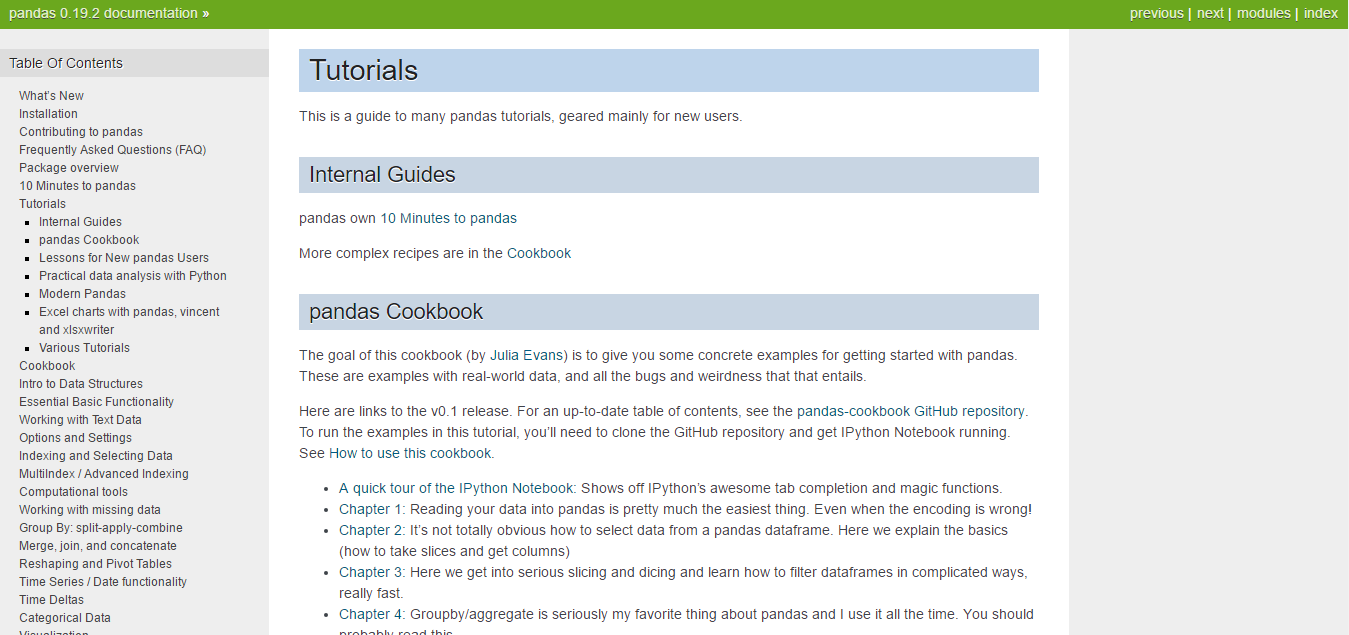

In [92]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Pandas3.png',width=800,height=10)

#### Another very useful function in Pandas is the read_fwf function. It lets you to read a text table or csv table with fixed widths into a dataframe in pandas. Lets look at one such table we have:

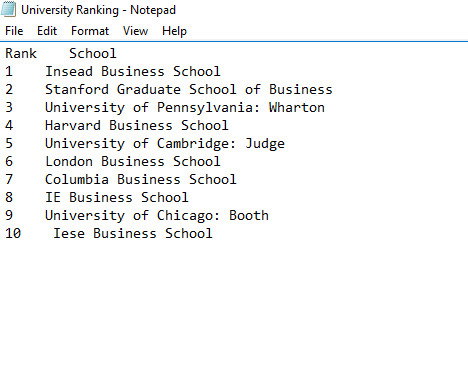

In [93]:
from IPython.display import Image
Image(filename='Files_Directory/Images/Edgar_Mutual_Pandas4.png',width=800,height=10)

#### Let us write the table into a data feame:

In [96]:
dataframe = pd.read_fwf("Files_Directory/Edgar/University Ranking.txt", header = 0)

In [97]:
dataframe

,Rank,School
0,1,Insead Business School
1,2,Stanford Graduate School of Business
2,3,University of Pennsylvania: Wharton
3,4,Harvard Business School
4,5,University of Cambridge: Judge
5,6,London Business School
6,7,Columbia Business School
7,8,IE Business School
8,9,University of Chicago: Booth
9,10,Iese Business School
